In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('data/bank_reviews3.csv')

# check the dimension of the dataset
print(data.shape)

# view the first 5 rows of the dataset
data.head()

(1000, 10)


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


In [3]:
data.drop(columns=['author', 'date', 'bank_image'], axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               1000 non-null   object 
 1   bank                  1000 non-null   object 
 2   rating                1000 non-null   float64
 3   review_title_by_user  1000 non-null   object 
 4   review                1000 non-null   object 
 5   rating_title_by_user  1000 non-null   object 
 6   useful_count          1000 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [5]:
#data.drop(columns=['author', 'date', 'bank_image'], axis=1, inplace=True)

In [6]:
numAddress = data['address'].nunique()
numBank = data['bank'].nunique()

print(f'The reviews are collected from {numBank} different banks that located around {numAddress} of places in UK.')
print('These banks are: ', data.bank.unique())

The reviews are collected from 10 different banks that located around 107 of places in UK.
These banks are:  ['SBI' 'Axis Bank' 'HDFC Bank' 'review' 'IDBI' 'Kotak' 'IndusInd Bank'
 'Canara Bank' 'Citibank' 'Punjab National Bank']


In [7]:
data['bank'].replace('review','Unknown', inplace=True)

In [8]:
data.head()

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count
0,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,133
1,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,89
2,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,48
3,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,52
4,Bangalore,Unknown,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22


In [9]:
location_mapping = {'Agartala': 'Birmingham',
'Agra': 'Liverpool',
'Ahmedabad':'Glasgow',
'Ajmer':'Oldham',
'Allahabad':'Edinburgh',
'Alleppey':'Leeds',
'Amalapuram':'Bristol',
'Anantnag':'Sheffield',
'Aurangabad':'Newcastle upon Tyne',
'Bangalore':'Cardiff',
'Bareilly':'Belfast',
'Bellary': 'Nottingham',
'Bhilwara': 'Southampton',
'Bhopal': 'Brighton',
'Bulandshahr': 'Leicester',
'Chandigarh':'Coventry',
'Chennai': 'Hull',
'Chikballapura': 'Stoke-on-Trent',
'Chittoor': 'Plymouth',
'Chittorgarh': 'Wolverhampton',
'Coimbatore': 'Derby',
'Darbhanga':'Swansea',
'Dehradun': 'Aberdeen',
'Delhi': 'Manchester',
'Dhule': 'Dundee',
'Dindigul': 'Portsmouth',
'Disabled keonjhar': 'York',
'Ernakulam': 'Cambridge',
'Faridabad': 'Oxford',
'Gadag':'Reading',
'Gandhinagar': 'Blackpool',
'Ghaziabad': 'Bournemouth',
'Goa': 'Luton',
'Guntur': 'Preston',
'Gurgaon': 'Milton Keynes',
'Guwahati':'Norwich',
'Haridwar': 'Ipswich',
'Haveri': 'Swindon',
'Hindupur': 'Wigan',
'Hooghly': 'Croydon',
'Hosur':'Bolton',
'Hubli': 'Middlesborough',
'Hyderabad':'Peterborough',
'Indore':'Huddersfield',
'Jaipur':'Slough',
'Jammu':'Southend-on-Sea',
'Jamshedpur':'Watford',
'Jhunjhunu':'Newport',
'Jodhpur': 'Exeter',
'Kalaburagi':'Gloucester',
'Kanchipuram':'Blackburn',
'Kanpur':'Maidstone',
'Karnal':'Poole',
'Kochi':'Telford',
'Kolhapur':'Dundee',
'Kolkata':'Basildon',
'Kollam':'Worthing',
'Kota':'Chelmsford',
'Krishnagiri':'Colchester',
'Lucknow':'Dagenham',
'Ludhiana':'Sutton Coldfield',
'Madurai':'Rotherham',
'Mahabubnagar':'Doncaster',
'Malegaon':'Woking',
'Mangalore':'Bedford',
'Medak':'Eastbourne',
'Meerut':'Crawley',
'Mohali':'Sutton',
'Moradabad':'Warrington',
'Mumbai':'London',
'Nagpur':'Rochdale',
'Namakkal':'Basingstoke',
'Nanded':'Solihull',
'Nasik':'Walsall',
'Navi mumbai':'Bury',
'Nellore':'Hereford',
'New delhi':'Stockport',
'Noida':'Lincoln',
'Palwal':'Chesterfield',
'Panchkula':'Gillingham',
'Panipat':'Grimsby',
'Parvathipuram':'Barnsley',
'Pondicherry':'Halifax',
'Pune':'Stevenage',
'Raichur':'Harrogate',
'Raipur':'Hartlepool',
'Rajahmundry':'Burton upon Trent',
'Rangareddy':'Ashford',
'Salem':'Lowestoft',
'Shillong':'Kettering',
'Srikakulam':'Hastings',
'Surat':'St Albans',
'Thane':'Weston-super-Mare',
'Thanjavur':'St Helens',
'Thiruvananthapuram':'Chester',
'Thrissur':'Nuneaton',
'Tinsukia':'Rugby',
'Tiruchirapalli':'Accrington',
'Tirunelveli':'Lancaster',
'Tirupur':'Kings Lynn',
'Tuticorin':'Hove',
'Udhampur':'Torquay',
'Vadodara':'Guildford',
'Vijayawada':'Aylesbury',
'Visakhapatnam':'Scunthorpe',
'Vizianagaram':'Stafford',
'Warangal':'Folkestone'}

In [10]:
data = data.replace(location_mapping)

In [11]:
data

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count
0,Stockport,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,133
1,Basildon,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,89
2,Croydon,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,48
3,Stevenage,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,52
4,Cardiff,Unknown,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22
...,...,...,...,...,...,...,...
995,Cambridge,Unknown,3.5,"""Good network of ATM""",I am holding a saving account with FEDERAL ban...,Pretty good,3
996,Cambridge,Axis Bank,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,Great!,0
997,Cardiff,Axis Bank,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",Great!,0
998,Peterborough,Axis Bank,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,Blown Away!,0


In [12]:
words_to_be_replaced = {'Axis Bank': 'Lloyds Bank', 'Axis bank':'Lloyds Bank', 'Axis':'Lloyds','Canara Bank':'Metro Bank', 'Citibank':'Halifax','HDFC bank':'HSBC','HDFC':'HSBC','HDFC Bank':'HSBC','IDBI':'Monzo','Indusind Bank':'NatWest','Indusind':'NatWest', 'IndusInd Bank':'NatWest','Kotak':'Barclays','Punjab National Bank': 'Nationwide','SBI':'Santander', 'rupees': 'pounds', 'rupee':'pound', 'Punjab':'England','Maharastra':'Scotland', 'India':'UK', 'State Bank Of India':'UK National Bank', 'AXIS bank':'Lloyds Bank', 'FEDERAL':'Royal Bank of Scotland'}

In [13]:
data = data.replace(words_to_be_replaced)

In [14]:
data.head()

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count
0,Stockport,Santander,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,133
1,Basildon,Santander,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,89
2,Croydon,Lloyds Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,48
3,Stevenage,HSBC,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,52
4,Cardiff,Unknown,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22


In [15]:
for old_word, new_word in words_to_be_replaced.items():
    data['review'] = data['review'].str.replace(old_word, new_word)

In [16]:
data['review']

0      State Bank Of UK is located nearby in our area...
1      I have my salary account in Santander, when I ...
2      I am using Lloyds Bank saving account for the ...
3      I have my salary bank account in HSBC for many...
4      Close to around 10 years, I am holding this Co...
                             ...                        
995    I am holding a saving account with Royal Bank ...
996    There is no mandatory balance to keep in my Ll...
997    In Lloyds Bank, every month they are charging ...
998    I have a salary account with Lloyds Bank and I...
999    Opened the savings account with Union bank of ...
Name: review, Length: 1000, dtype: object

In [17]:
data['bank'].unique()

array(['Santander', 'Lloyds Bank', 'HSBC', 'Unknown', 'Monzo', 'Barclays',
       'NatWest', 'Metro Bank', 'Halifax', 'Nationwide'], dtype=object)

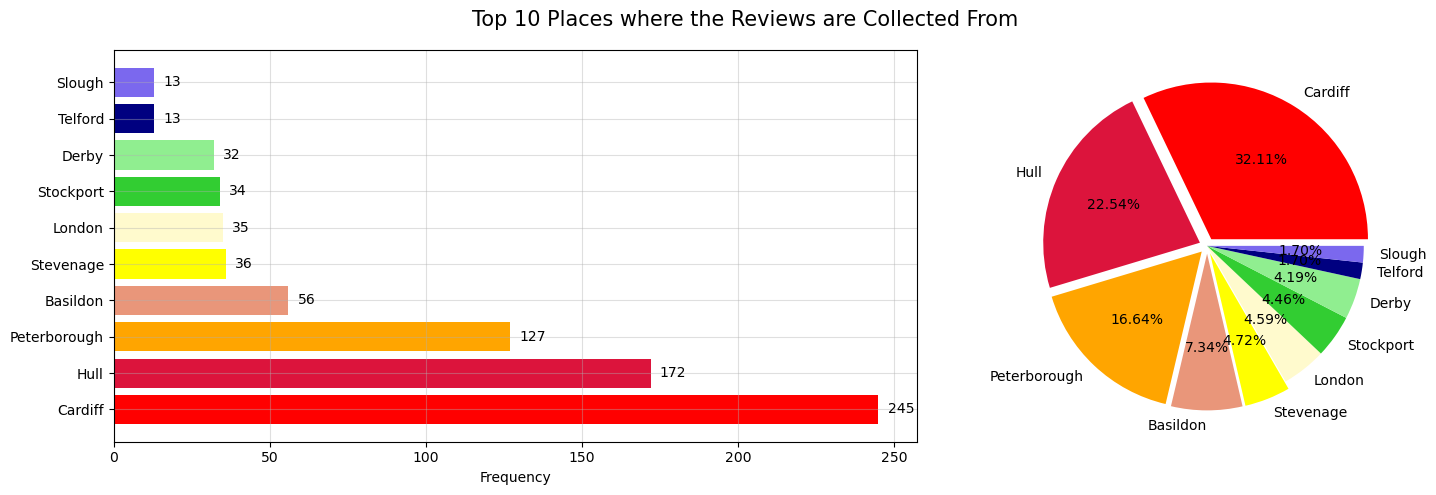

In [18]:
# distribution of the column 'address'
address = data['address'].value_counts().sort_values(ascending=False)[:10]

colors = ['red','crimson','orange','darksalmon','yellow','lemonchiffon','limegreen','lightgreen','navy','mediumslateblue']
explodes = ([0.05]*5) + ([0]*5)

# visualization (top 10 places where the reviews are collected from)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=address.index, width=address.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (address):
    axes[0].text(values+3, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(address.values, labels=address.index, autopct='%.2f%%', explode=explodes, colors=colors)
figure.suptitle('Top 10 Places where the Reviews are Collected From', fontsize=15)
plt.tight_layout()
plt.show()

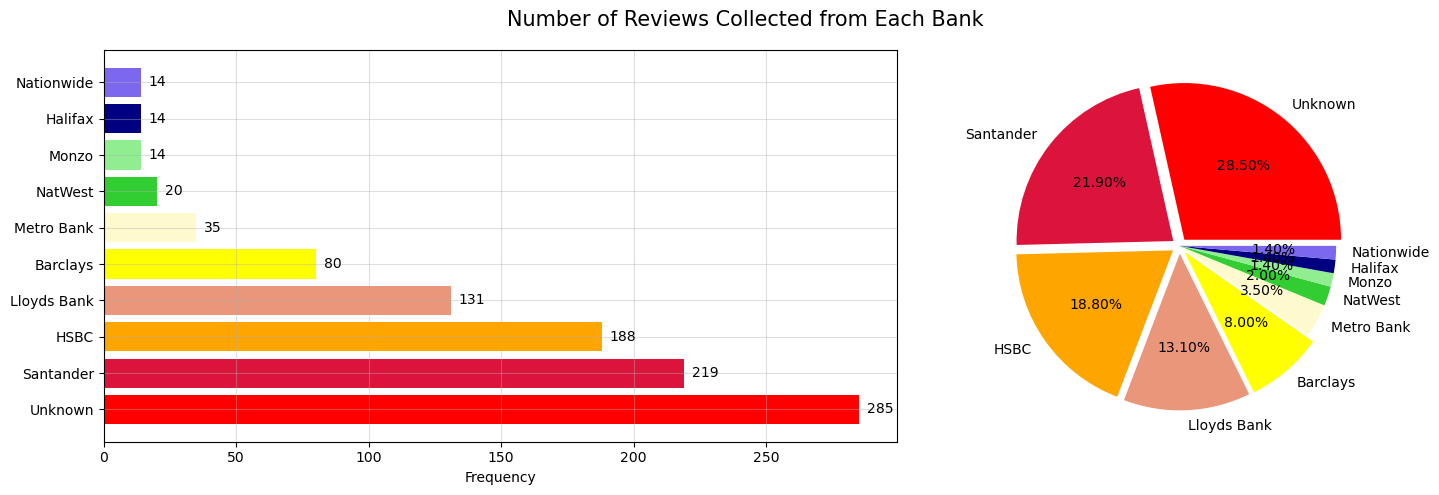

In [19]:
# distribution of the data by 'bank'
bank = data['bank'].value_counts().sort_values(ascending=False)

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=bank.index, width=bank.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (bank):
    axes[0].text(values+3, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(bank.values, labels=bank.index, autopct='%.2f%%', explode=explodes, colors=colors)
figure.suptitle('Number of Reviews Collected from Each Bank', fontsize=15)
plt.tight_layout()
plt.show()

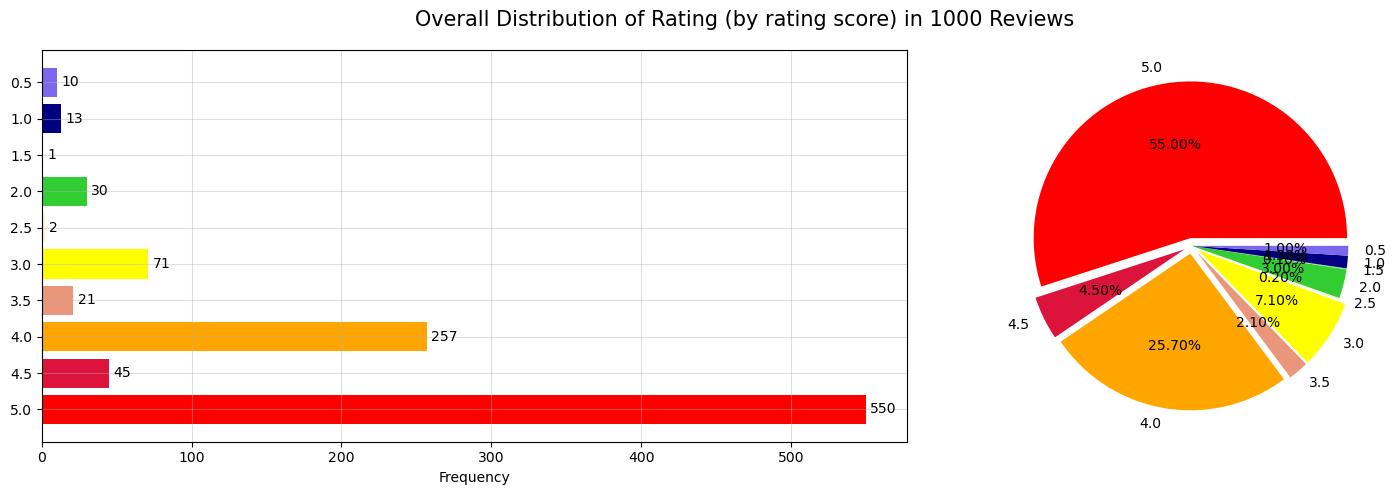

In [20]:
# distribution of rating (by rating score)
# convert the rating from int to str
data_copy = data.copy()
data_copy['rating'] = data_copy['rating'].astype(str)

rating = data_copy['rating'].value_counts().sort_index(ascending=False)

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=rating.index, width=rating.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (rating):
    axes[0].text(values+3, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(rating.values, labels=rating.index, autopct='%.2f%%', explode=explodes, colors=colors)
figure.suptitle('Overall Distribution of Rating (by rating score) in 1000 Reviews', fontsize=15)
plt.tight_layout()
plt.show()

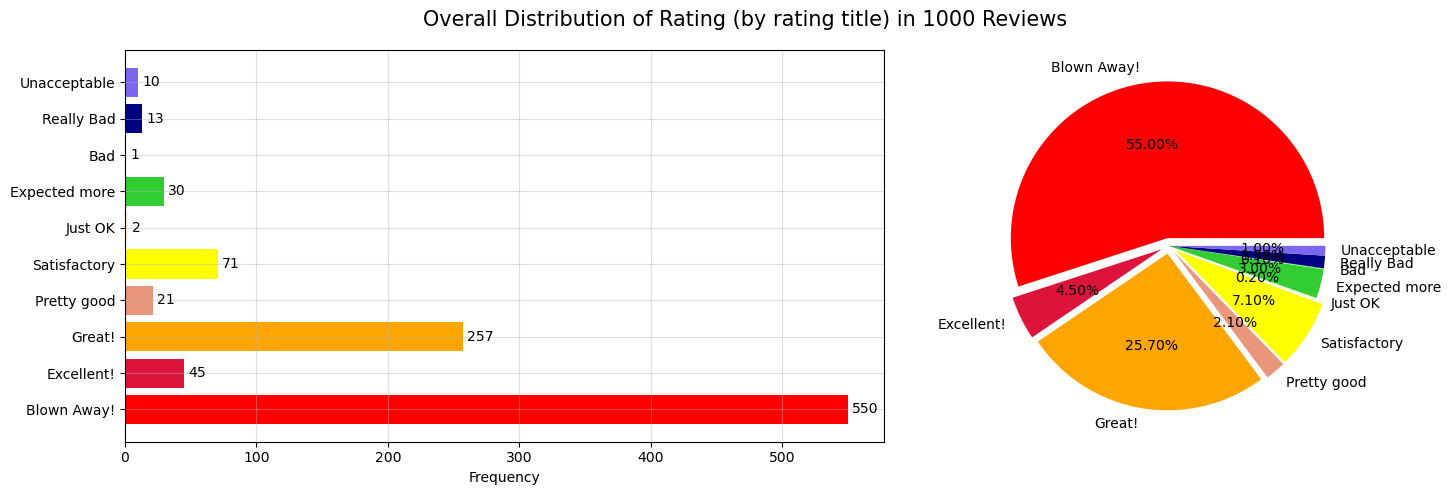

In [21]:
# distribution of rating (by rating title)
rating_order = ['Unacceptable','Really Bad','Bad','Expected more','Just OK','Satisfactory','Pretty good','Great!','Excellent!','Blown Away!']
rating_title = data['rating_title_by_user'].value_counts(sort=False).reindex(rating_order)
reversed_rating_title = rating_title[::-1]

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=reversed_rating_title.index, width=reversed_rating_title.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (reversed_rating_title):
    axes[0].text(values+3, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(reversed_rating_title.values, labels=reversed_rating_title.index, autopct='%.2f%%', explode=explodes, colors=colors)
figure.suptitle('Overall Distribution of Rating (by rating title) in 1000 Reviews', fontsize=15)
plt.tight_layout()
plt.show()

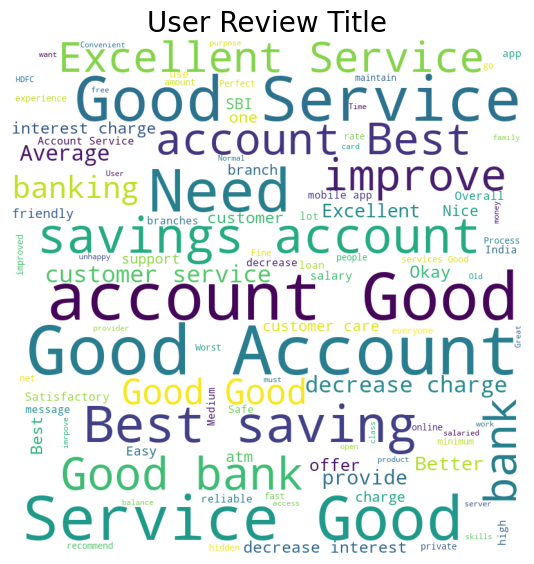

In [22]:
from wordcloud import WordCloud

combined_title = ' '.join(data['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('User Review Title', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

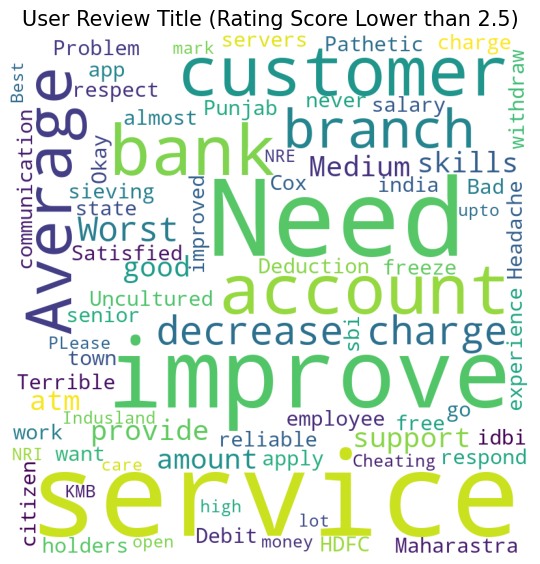

In [23]:
# subset the data that rating score is 2.5 and lower
data_copy = data.copy()
data_copy = data[data['rating']<=2.5]

combined_title_lowrate = ' '.join(data_copy['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_lowrate = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title_lowrate)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_lowrate)
plt.axis('off')
plt.title('User Review Title (Rating Score Lower than 2.5)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [24]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the object of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
